## *Вступ до машинного навчання*
## *Лабораторна робота №2*
    
    
<p style="text-align: right;"> виконала: Немировська Вікторія </p>
<p style="text-align: right;"> група: ДА-01 </p>

# *EDA*

In [1]:
#import libraries
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns

Спочатку розглянемо файл HomeCredit_columns_description.csv у якому знаходиться опис колонок. Файл application_{train|test}.csv містить дані про людей, яким важко отримати позики через недостатню або відсутню кредитну історію. Колонки характеризують їх стать, сімейний статус, освіта, зайнятість, дохід, місце проживання, наявність документів, кредитну суму тощо. Колонка TARGET визначає платоспроможність клієнта.

In [2]:
pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 200)
description = pd.read_csv("HomeCredit_columns_description.csv",
                          usecols=["Table", "Row", "Description", "Special"])
description = description[description.Table == "application_{train|test}.csv"]
description

Table                           Row   
0    application_{train|test}.csv                    SK_ID_CURR  \
1    application_{train|test}.csv                        TARGET   
2    application_{train|test}.csv            NAME_CONTRACT_TYPE   
3    application_{train|test}.csv                   CODE_GENDER   
4    application_{train|test}.csv                  FLAG_OWN_CAR   
5    application_{train|test}.csv               FLAG_OWN_REALTY   
6    application_{train|test}.csv                  CNT_CHILDREN   
7    application_{train|test}.csv              AMT_INCOME_TOTAL   
8    application_{train|test}.csv                    AMT_CREDIT   
9    application_{train|test}.csv                   AMT_ANNUITY   
10   application_{train|test}.csv               AMT_GOODS_PRICE   
11   application_{train|test}.csv               NAME_TYPE_SUITE   
12   application_{train|test}.csv              NAME_INCOME_TYPE   
13   application_{train|test}.csv           NAME_EDUCATION_TYPE   
14   application_{train|test}.csv            NAME_FAMILY_STATUS   
15   application_{train|test}.csv             NAME_HOUSING_TYPE   
16   application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17   application_{train|test}.csv                    DAYS_BIRTH   
18   application_{train|test}.csv                 DAYS_EMPLOYED   
19   application_{train|test}.csv             DAYS_REGISTRATION   
20   application_{train|test}.csv               DAYS_ID_PUBLISH   
21   application_{train|test}.csv                   OWN_CAR_AGE   
22   application_{train|test}.csv                    FLAG_MOBIL   
23   application_{train|test}.csv                FLAG_EMP_PHONE   
24   application_{train|test}.csv               FLAG_WORK_PHONE   
25   application_{train|test}.csv              FLAG_CONT_MOBILE   
26   application_{train|test}.csv                    FLAG_PHONE   
27   application_{train|test}.csv                    FLAG_EMAIL   
28   application_{train|test}.csv               OCCUPATION_TYPE   
29   application_{train|test}.csv               CNT_FAM_MEMBERS   
30   application_{train|test}.csv          REGION_RATING_CLIENT   
31   application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32   application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33   application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34   application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35   application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36   application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37   application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38   application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39   application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40   application_{train|test}.csv             ORGANIZATION_TYPE   
41   application_{train|test}.csv                  EXT_SOURCE_1   
42   application_{train|test}.csv                  EXT_SOURCE_2   
43   application_{train|test}.csv                  EXT_SOURCE_3   
44   application_{train|test}.csv                APARTMENTS_AVG   
45   application_{train|test}.csv              BASEMENTAREA_AVG   
46   application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47   application_{train|test}.csv               YEARS_BUILD_AVG   
48   application_{train|test}.csv                COMMONAREA_AVG   
49   application_{train|test}.csv                 ELEVATORS_AVG   
50   application_{train|test}.csv                 ENTRANCES_AVG   
51   application_{train|test}.csv                 FLOORSMAX_AVG   
52   application_{train|test}.csv                 FLOORSMIN_AVG   
53   application_{train|test}.csv                  LANDAREA_AVG   
54   application_{train|test}.csv          LIVINGAPARTMENTS_AVG   
55   application_{train|test}.csv                LIVINGAREA_AVG   
56   application_{train|test}.csv       NONLIVINGAPARTMENTS_AVG   
57   application_{train|test}.csv             NONLIVINGAREA_AVG   
58   application_{train|test}.csv               APARTMENTS_MODE   
59   app

In [3]:
#load train dataset
train = pd.read_csv("application_train.csv")
train.sample(15)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
233047      369928       1         Cash loans           F            N  \
116315      234885       0         Cash loans           F            Y   
213435      347326       0         Cash loans           F            N   
158925      284240       0         Cash loans           F            N   
145011      268145       0         Cash loans           F            N   
68186       179069       0         Cash loans           F            N   
42140       148784       0         Cash loans           M            Y   
200095      331961       0         Cash loans           F            Y   
130763      251665       0         Cash loans           F            N   
236298      373700       0         Cash loans           M            Y   
291803      438052       0         Cash loans           F            Y   
41448       147985       0         Cash loans           F            N   
43497       150356       1         Cash loans           M            Y   
68524       179472       0    Revolving loans           M            Y   
219501      354287       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
233047               Y             1          225000.0    745429.5  \
116315               Y             1           54000.0    102384.0   
213435               Y             0          135000.0    270000.0   
158925               Y             1          135000.0    253737.0   
145011               Y             0          211500.0   1288350.0   
68186                N             0          157500.0    315000.0   
42140                Y             0          157500.0    417024.0   
200095               N             2           45000.0     67500.0   
130763               Y             2           54000.0    226908.0   
236298               N             1          202500.0    900000.0   
291803               Y             0           90000.0    599778.0   
41448                Y             0          135000.0   1107981.0   
43497                Y             1          157500.0    339241.5   
68524                Y             1          166500.0    270000.0   
219501               Y             1           67500.0    408780.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE   
233047      38191.5         643500.0   Unaccompanied               Working  \
116315       6673.5          81000.0   Unaccompanied               Working   
213435      16443.0         270000.0   Unaccompanied               Working   
158925      16344.0         229500.0   Unaccompanied         State servant   
145011      41692.5        1125000.0          Family  Commercial associate   
68186       11313.0         315000.0   Unaccompanied               Working   
42140       27094.5         360000.0   Unaccompanied               Working   
200095       7087.5          67500.0          Family               Working   
130763      11164.5         148500.0   Unaccompanied               Working   
236298      29164.5         900000.0   Unaccompanied         State servant   
291803      25542.0         477000.0          Family             Pensioner   
41448       32526.0         967500.0   Unaccompanied             Pensioner   
43497       12919.5         238500.0   Unaccompanied  Commercial associate   
68524       13500.0         270000.0          Family               Working   
219501      14809.5         337500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS   
233047  Secondary / secondary special               Married  \
116315  Secondary / secondary special               Married   
213435  Secondary / secondary special               Married   
158925              Incomplete higher               Married   
145011  Secondary / secondary special               Married   
68186                Higher education        Civil marriage   
42140       

In [4]:
#load test dataset
test = pd.read_csv("application_test.csv")
test.sample(15)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   
42263      408903         Cash loans           F            N               N  \
13299      196505         Cash loans           F            Y               Y   
38566      383447         Cash loans           F            Y               Y   
45914      435534         Cash loans           F            N               Y   
46527      440030         Cash loans           M            N               Y   
1409       109992         Cash loans           M            Y               Y   
17788      228863         Cash loans           M            N               Y   
20493      248635         Cash loans           F            Y               Y   
41130      402416         Cash loans           F            N               N   
24126      275767         Cash loans           M            Y               N   
16592      219864         Cash loans           F            Y               N   
47465      446905         Cash loans           M            N               Y   
36992      370685         Cash loans           F            N               Y   
40587      398757         Cash loans           M            N               Y   
780        105390         Cash loans           M            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
42263             0          112500.0    904500.0      32485.5  \
13299             0           90000.0    272578.5      21663.0   
38566             0          202500.0   1094373.0      35433.0   
45914             0           81000.0     99000.0      10791.0   
46527             0          202500.0    358344.0      22900.5   
1409              1          202500.0    786528.0      50395.5   
17788             0          135000.0    270000.0      17253.0   
20493             0           72000.0    817560.0      30951.0   
41130             0           90000.0    550489.5      19773.0   
24126             2          202500.0    312768.0      19264.5   
16592             0          180000.0   1113399.0      49666.5   
47465             0          234000.0   1024740.0      52452.0   
36992             2          112500.0    502186.5      48919.5   
40587             0          157500.0    768505.5      29101.5   
780               2          432000.0    305640.0      32094.0   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE   
42263         904500.0   Unaccompanied               Working  \
13299         207000.0   Unaccompanied               Working   
38566         913500.0          Family  Commercial associate   
45914          99000.0          Family               Working   
46527         283500.0   Unaccompanied               Working   
1409          720000.0   Unaccompanied               Working   
17788         270000.0   Unaccompanied             Pensioner   
20493         675000.0   Unaccompanied             Pensioner   
41130         454500.0   Unaccompanied             Pensioner   
24126         270000.0   Unaccompanied               Working   
16592         945000.0   Unaccompanied               Working   
47465         900000.0   Unaccompanied             Pensioner   
36992         477000.0   Unaccompanied  Commercial associate   
40587         634500.0   Unaccompanied             Pensioner   
780           270000.0   Unaccompanied         State servant   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
42263  Secondary / secondary special               Married  House / apartment  \
13299  Secondary / secondary special  Single / not married  House / apartment   
38566  Secondary / secondary special               Married  House / apartment   
45914  Secondary / secondary special               Married  House / apartment   
46527               Higher education  Single / not married       With parents   
1409                Higher education               Married  House / apartment   
17788               Higher education               Married  H

## *Negative values*

In [5]:
negative_days = {"DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"}

for i in negative_days:
    train[i] = train[i].abs()
    test[i] = test[i].abs()

Переглянувши наведені вище приклади даних можна відмітити, що тут є як категоріальні, так і чисельні змінні. Також є багато відсутніх значень та присутні від'ємні значення для кількості днів. Від'ємні значення були взяті по модулю.

In [6]:
#set type "category" for categorical features
categorical_features = {"NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE",
                        "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL",
                        "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE",
                        "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START",
                        "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE",
                        "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE",
                        "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6",
                        "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11",
                        "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
                        "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"}

for feature in categorical_features:
    train[["TARGET", feature]] = train[["TARGET", feature]].astype("category")
    
for feature in categorical_features:
    test[feature] = test[feature].astype("category")
                        
numeric_features = train.select_dtypes(include = ["float64", "int64"]).columns

## *Duplicates*

In [7]:
#getting duplicated rows in train dataset
train[train.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [8]:
#getting duplicated rows in test dataset
test[test.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, ...]
Index: []

Ні тренувальний, ні тестовий набори даних не мають дублікатів.

## *Distributions*

In [9]:
train.describe(include="all")

SK_ID_CURR    TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
count   307511.000000  307511.0             307511      307511       307511  \
unique            NaN       2.0                  2           3            2   
top               NaN       0.0         Cash loans           F            N   
freq              NaN  282686.0             278232      202448       202924   
mean    278180.518577       NaN                NaN         NaN          NaN   
std     102790.175348       NaN                NaN         NaN          NaN   
min     100002.000000       NaN                NaN         NaN          NaN   
25%     189145.500000       NaN                NaN         NaN          NaN   
50%     278202.000000       NaN                NaN         NaN          NaN   
75%     367142.500000       NaN                NaN         NaN          NaN   
max     456255.000000       NaN                NaN         NaN          NaN   

       FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT   
count           307511  307511.000000      3.075110e+05  3.075110e+05  \
unique               2            NaN               NaN           NaN   
top                  Y            NaN               NaN           NaN   
freq            213312            NaN               NaN           NaN   
mean               NaN       0.417052      1.687979e+05  5.990260e+05   
std                NaN       0.722121      2.371231e+05  4.024908e+05   
min                NaN       0.000000      2.565000e+04  4.500000e+04   
25%                NaN       0.000000      1.125000e+05  2.700000e+05   
50%                NaN       0.000000      1.471500e+05  5.135310e+05   
75%                NaN       1.000000      2.025000e+05  8.086500e+05   
max                NaN      19.000000      1.170000e+08  4.050000e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
count   307499.000000     3.072330e+05          306219           307511  \
unique            NaN              NaN               7                8   
top               NaN              NaN   Unaccompanied          Working   
freq              NaN              NaN          248526           158774   
mean     27108.573909     5.383962e+05             NaN              NaN   
std      14493.737315     3.694465e+05             NaN              NaN   
min       1615.500000     4.050000e+04             NaN              NaN   
25%      16524.000000     2.385000e+05             NaN              NaN   
50%      24903.000000     4.500000e+05             NaN              NaN   
75%      34596.000000     6.795000e+05             NaN              NaN   
max     258025.500000     4.050000e+06             NaN              NaN   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
count                          307511             307511             307511  \
unique                              5                  6                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                           218391             196432             272868   
mean                              NaN                NaN                NaN   
std                               NaN                NaN                NaN   
min                               NaN                NaN                NaN   
25%                               NaN                NaN                NaN   
50%                               NaN                NaN                NaN   
75%                               NaN                NaN                NaN   
max                               NaN                NaN                NaN   

        REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED   
count                307511.000000  307511.000000  307511.000000  \
unique                         NaN            NaN            NaN   
top                            NaN            NaN            NaN   
freq                           NaN            NaN            Na

Дані не збалансовані. З $307511$ рядків $282686$ - $0$ (це становить $91,927$%) і лише $24825$ - $1$ (складає $8,073$%). Також таку тенденцію можна спостерігати й у інших колонках.

<Axes: xlabel='TARGET', ylabel='Count'>

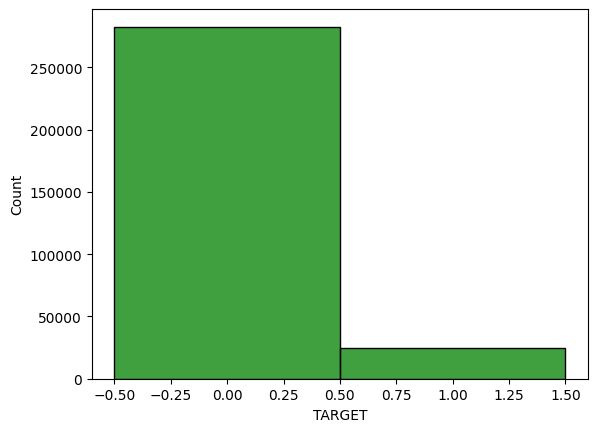

In [10]:
sns.histplot(train["TARGET"], color="green")

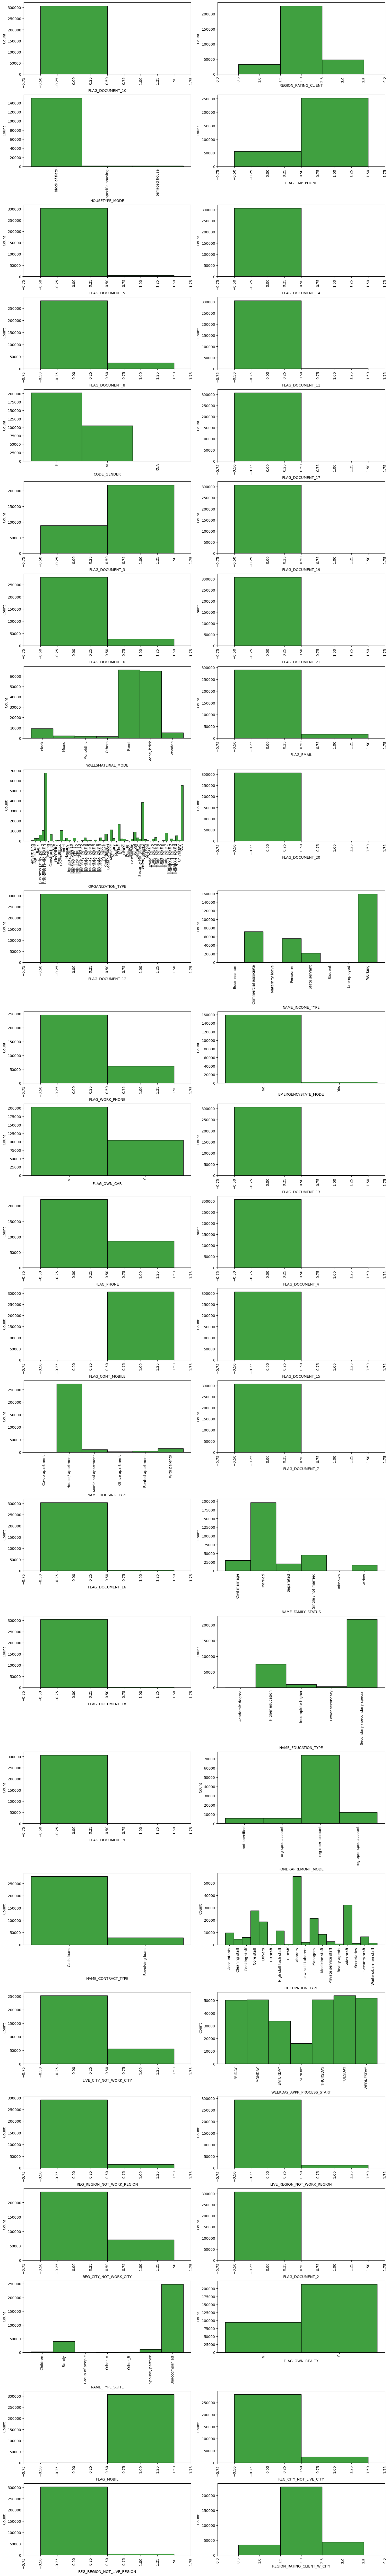

In [11]:
categorical_features = list(categorical_features)
numeric_features = list(numeric_features)

fig, axes = plt.subplots(nrows=math.ceil(len(categorical_features)/2), ncols=2, figsize=(15, 100), layout="constrained")

for i, ax in enumerate(axes.flat):
    sns.histplot(train[categorical_features][categorical_features[i]], ax=ax, color="green")
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Більшість категоріальних даних розподілені не рівномірно, наприклад, багато документів, які майже ніким не надавались, мало хто з клієнтів мав супровід. Рівномірний розподіл має день тижня, у котрий клієнт звернувся з метою отримати кредит.

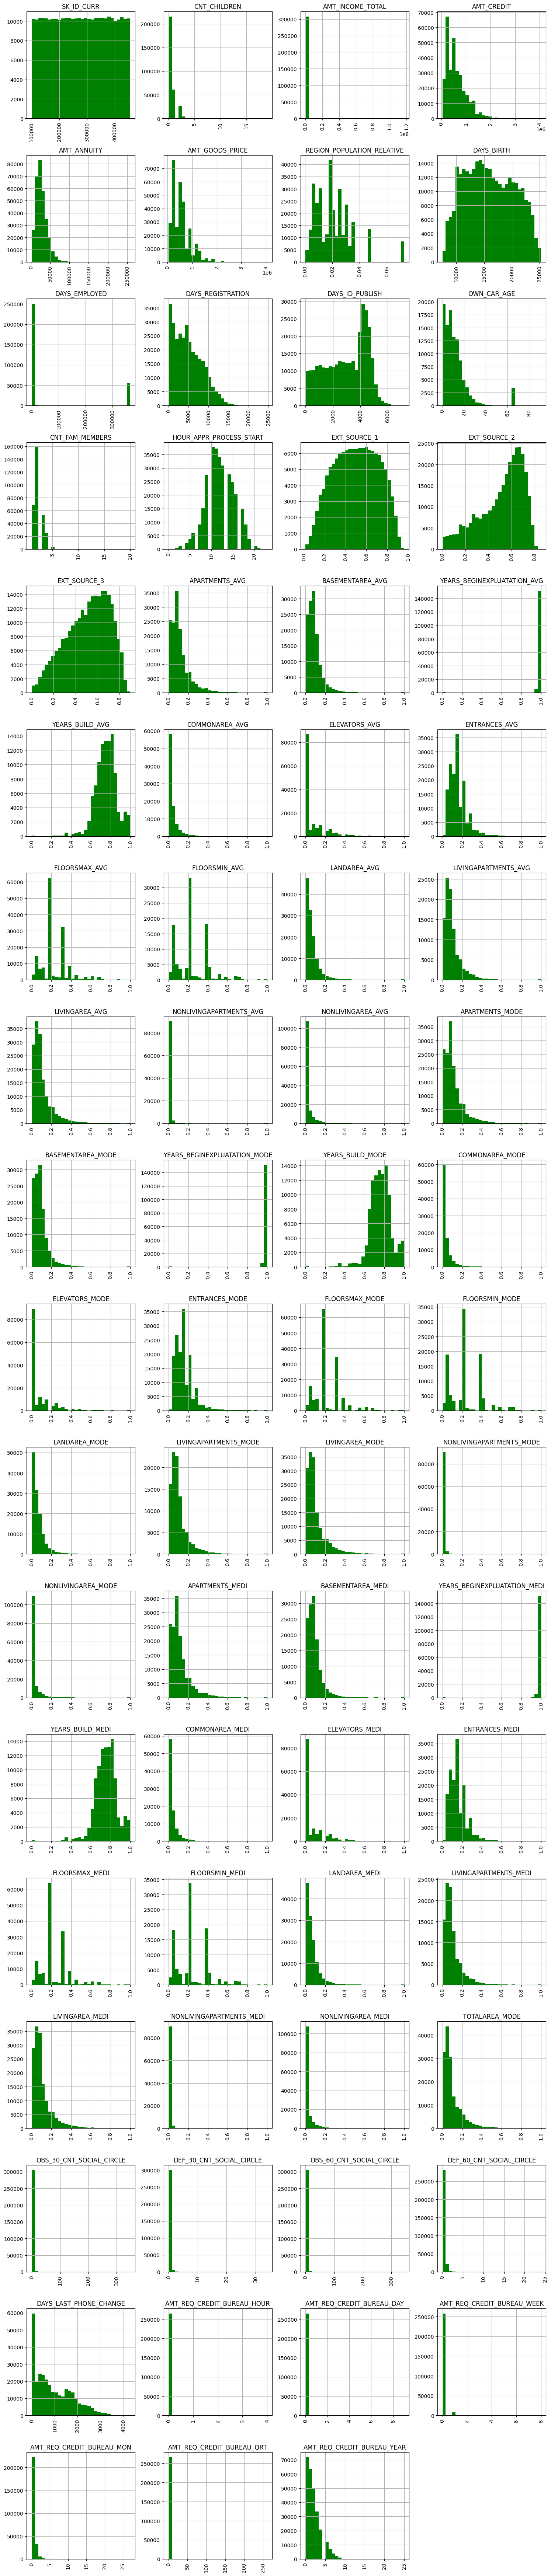

In [12]:
hist_plt = train[numeric_features].hist(figsize=(15, 70), color = "green", bins=30,
                                          xrot=90, layout=(math.ceil(len(numeric_features)/4), 4))
plt.tight_layout()

Чисельні неперервні змінні у більшості випадків мають експоненційний або нормальний розподіли. Фітчі, які є дискретними зазвичай мають піки, де значно переважає якесь одне значення, наприклад кількість звернень до кредитного бюро.

## *Outliers*

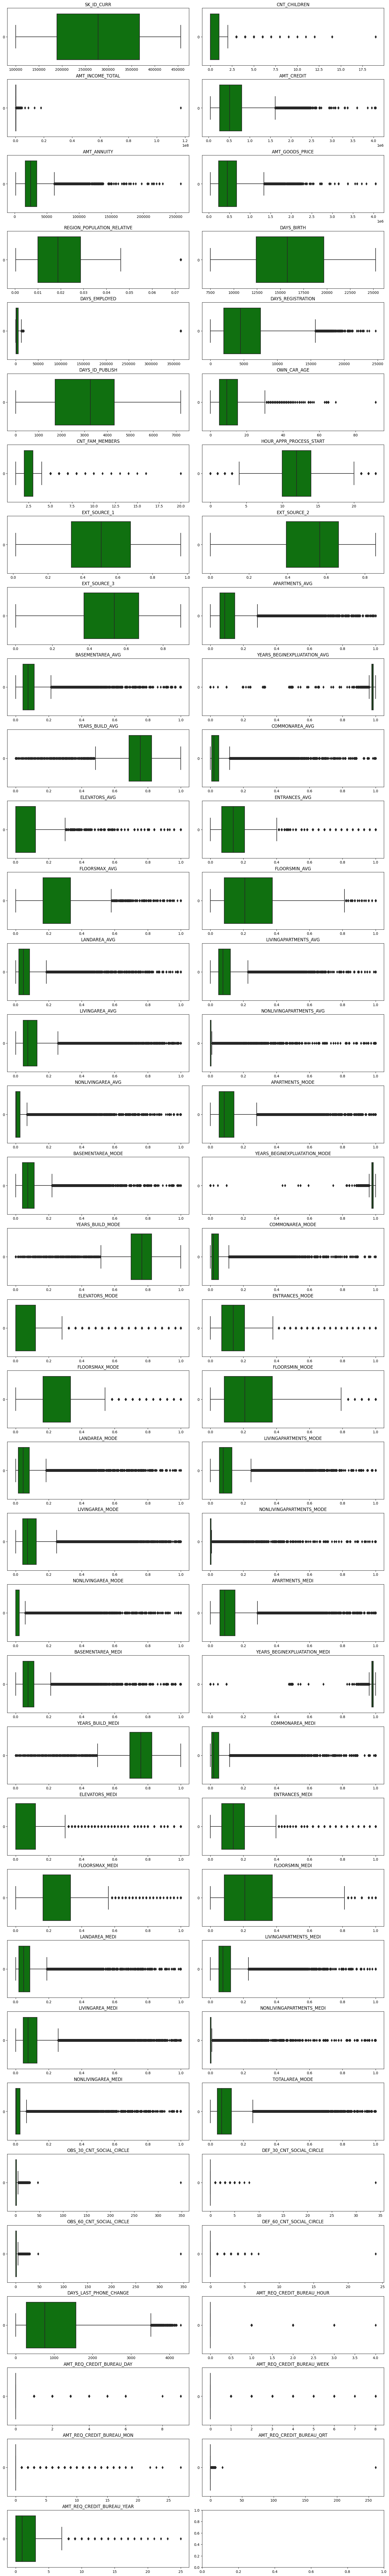

In [13]:
fig, axes = plt.subplots(nrows=math.ceil(len(numeric_features)/2), ncols=2, figsize=(15, 100), layout="constrained")

for i, ax in enumerate(axes.flat):
    if(i<len(numeric_features)):
        sns.boxplot(data=train[numeric_features][numeric_features[i]], orient="h", ax=ax, color="green").set_title(numeric_features[i])

У більшості випадків outlires містять прийнятну інформацію і не схожі на помилкові дані. Сумнівним є значення щодо $20$ членів родини, але таке теоритично можливо. outlires є у OWN_CAR_AGE (маловірогідно, що машині буде більше $60$ років), DAYS_EMPLOYED (навіть якщо хтось працюватиме більше $60$ років приблизно = $20000$ днів), AMT_INCOME_TOTAL (дохід трохи менше ніж у $120000000$). Через велику кількість нормалізованих фітч важко оцінити їх прийнятність.

In [14]:
train = train[train["DAYS_EMPLOYED"] <= 20000]
train = train[train["AMT_INCOME_TOTAL"] <= 20000000]
train = train[(train["OWN_CAR_AGE"] <= 60) | (train["OWN_CAR_AGE"].isna())]

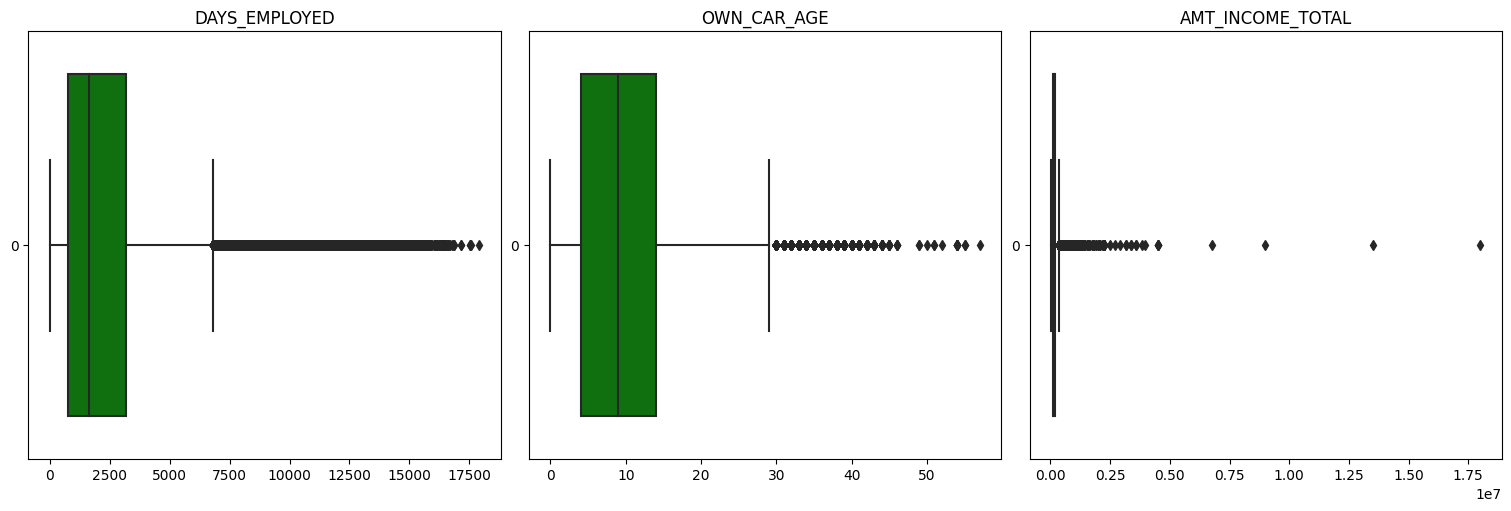

In [15]:
outl_features = list({"DAYS_EMPLOYED", "AMT_INCOME_TOTAL", "OWN_CAR_AGE"})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), layout="constrained")

for i, ax in enumerate(axes.flat):
        sns.boxplot(data=train[outl_features][outl_features[i]],
                    orient="h", ax=ax, color="green").set_title(outl_features[i])

In [16]:
train[numeric_features].median()

SK_ID_CURR                      278090.000000
CNT_CHILDREN                         0.000000
AMT_INCOME_TOTAL                157500.000000
AMT_CREDIT                      521280.000000
AMT_ANNUITY                      25843.500000
AMT_GOODS_PRICE                 450000.000000
REGION_POPULATION_RELATIVE           0.018850
DAYS_BIRTH                       14591.000000
DAYS_EMPLOYED                     1651.000000
DAYS_REGISTRATION                 4269.000000
DAYS_ID_PUBLISH                   2889.000000
OWN_CAR_AGE                          9.000000
CNT_FAM_MEMBERS                      2.000000
HOUR_APPR_PROCESS_START             12.000000
EXT_SOURCE_1                         0.481448
EXT_SOURCE_2                         0.567078
EXT_SOURCE_3                         0.522697
APARTMENTS_AVG                       0.088000
BASEMENTAREA_AVG                     0.076400
YEARS_BEGINEXPLUATATION_AVG          0.981600
YEARS_BUILD_AVG                      0.755200
COMMONAREA_AVG                    

In [17]:
train[numeric_features].mean()

SK_ID_CURR                      278110.442810
CNT_CHILDREN                         0.497528
AMT_INCOME_TOTAL                175476.337125
AMT_CREDIT                      611977.528586
AMT_ANNUITY                      27828.701622
AMT_GOODS_PRICE                 549962.603850
REGION_POPULATION_RELATIVE           0.020882
DAYS_BIRTH                       14785.375298
DAYS_EMPLOYED                     2388.216763
DAYS_REGISTRATION                 4638.837779
DAYS_ID_PUBLISH                   2802.506844
OWN_CAR_AGE                         10.174026
CNT_FAM_MEMBERS                      2.252740
HOUR_APPR_PROCESS_START             12.200167
EXT_SOURCE_1                         0.482356
EXT_SOURCE_2                         0.516150
EXT_SOURCE_3                         0.500957
APARTMENTS_AVG                       0.118302
BASEMENTAREA_AVG                     0.088541
YEARS_BEGINEXPLUATATION_AVG          0.977488
YEARS_BUILD_AVG                      0.752834
COMMONAREA_AVG                    

## *Correlation*

### *Numeric features*

<Axes: >

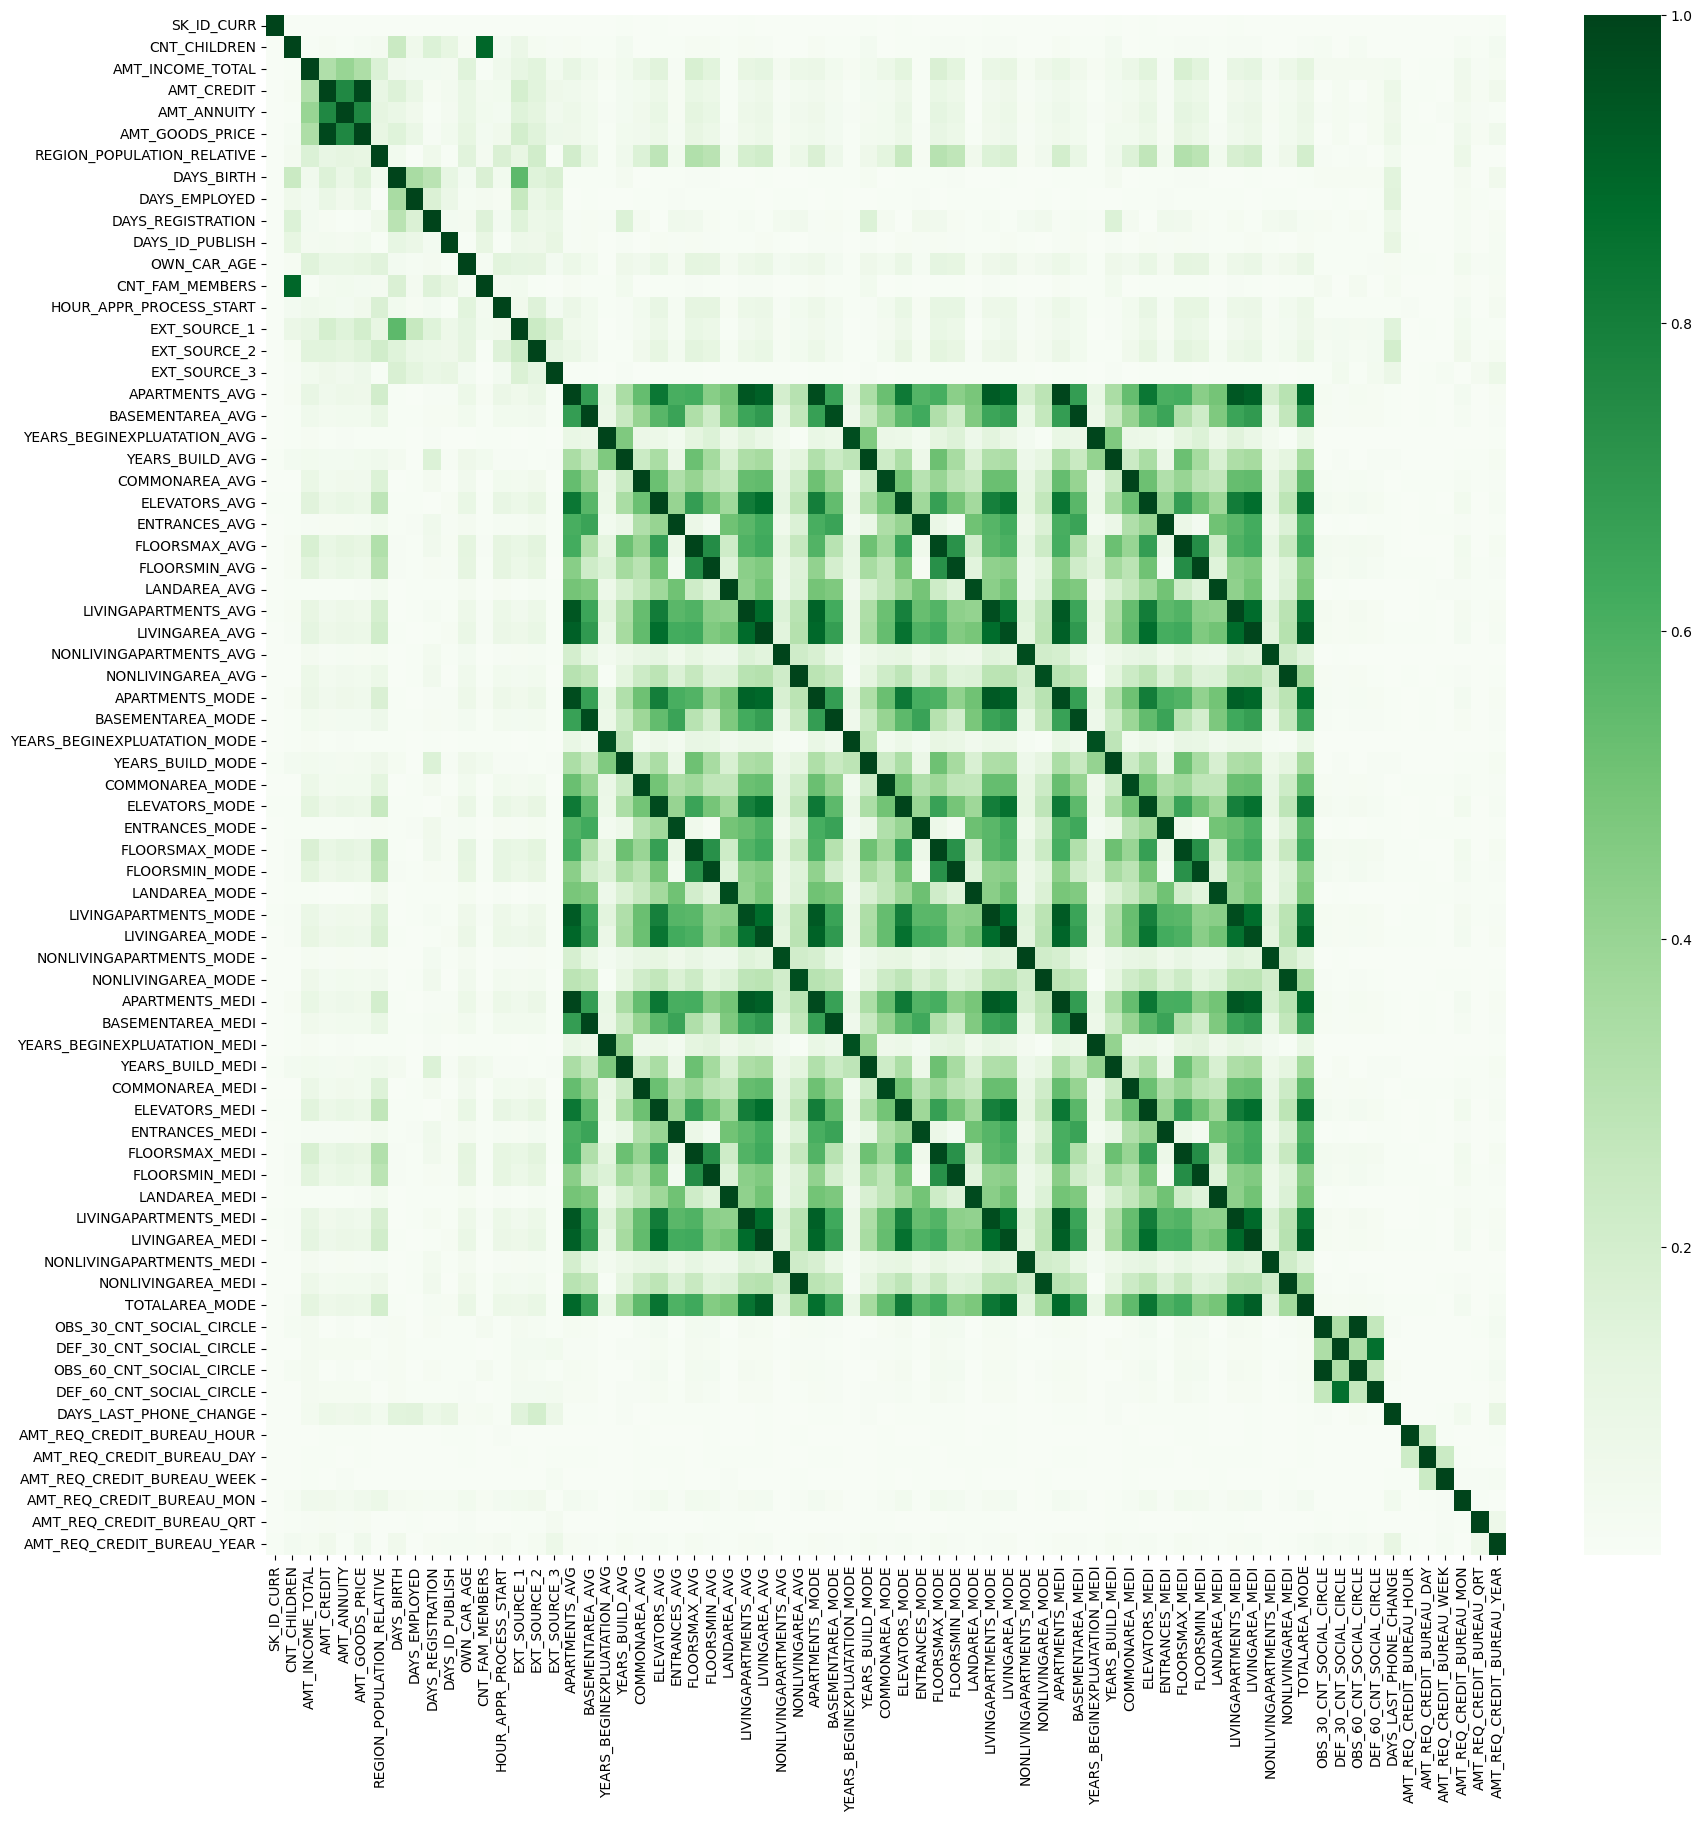

In [18]:
corr_mat = train[numeric_features].corr().abs()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(corr_mat, cmap="Greens")

1. Дані про будівлю місця проживання є високо корельованими між собою і на мою думку не повинні мати вплив на вирішення щодо платоспроможності клієнта.
2. Дані про кількість дітей та членів родини є також високо корельованими, тому можна відсіяти CNT_CHILDREN.
3. ID рядку не є інформативним.
4. Серед колонок AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE залишимо AMT_CREDIT.
5. Через високу кореляцію серед OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE відсіємо OBS_30_CNT_SOCIAL_CIRCLE, серед DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE відсіємо DEF_30_CNT_SOCIAL_CIRCLE.
6. AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK виключено, оскільки проміжок часу є малим.
7. Також змінна HOUR_APPR_PROCESS_START не має нести вплив на рішення.

<Axes: >

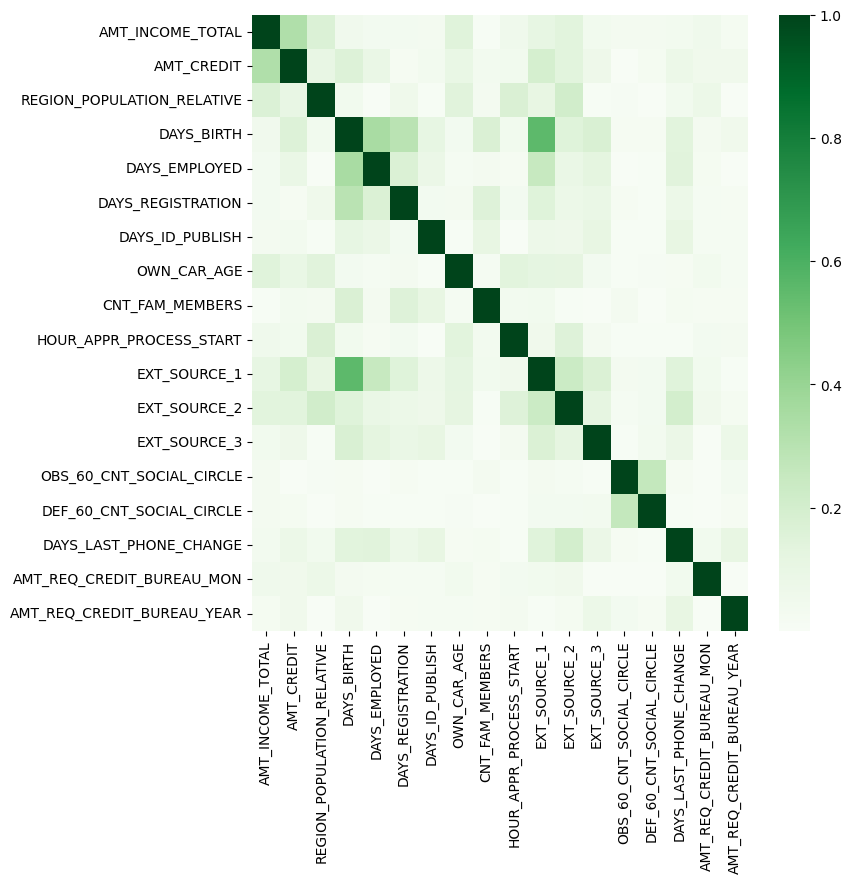

In [19]:
end_index = numeric_features.index("APARTMENTS_AVG")
start_index = numeric_features.index("OBS_30_CNT_SOCIAL_CIRCLE")

num_features_1 = numeric_features[:end_index] + numeric_features[start_index:]
features_to_remove = {"SK_ID_CURR", "CNT_CHILDREN", "AMT_ANNUITY", "AMT_GOODS_PRICE", "OBS_30_CNT_SOCIAL_CIRCLE",
                     "DEF_30_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
                     "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT"}

for feature in features_to_remove:
    num_features_1.remove(feature)

corr_mat = train[num_features_1].corr().abs()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(8, 8)
sns.heatmap(corr_mat, cmap="Greens")

### *Categorical features*

Щоб побудувати кореляційну матрицю використано метод Cramer's V, за допомогою якого обчислюється кореляція між категоріальними змінними.

Посилання:
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [20]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

C:\Users\nemiv\AppData\Local\Temp\ipykernel_10888\1955342849.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\nemiv\AppData\Local\Temp\ipykernel_10888\1955342849.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


<Axes: >

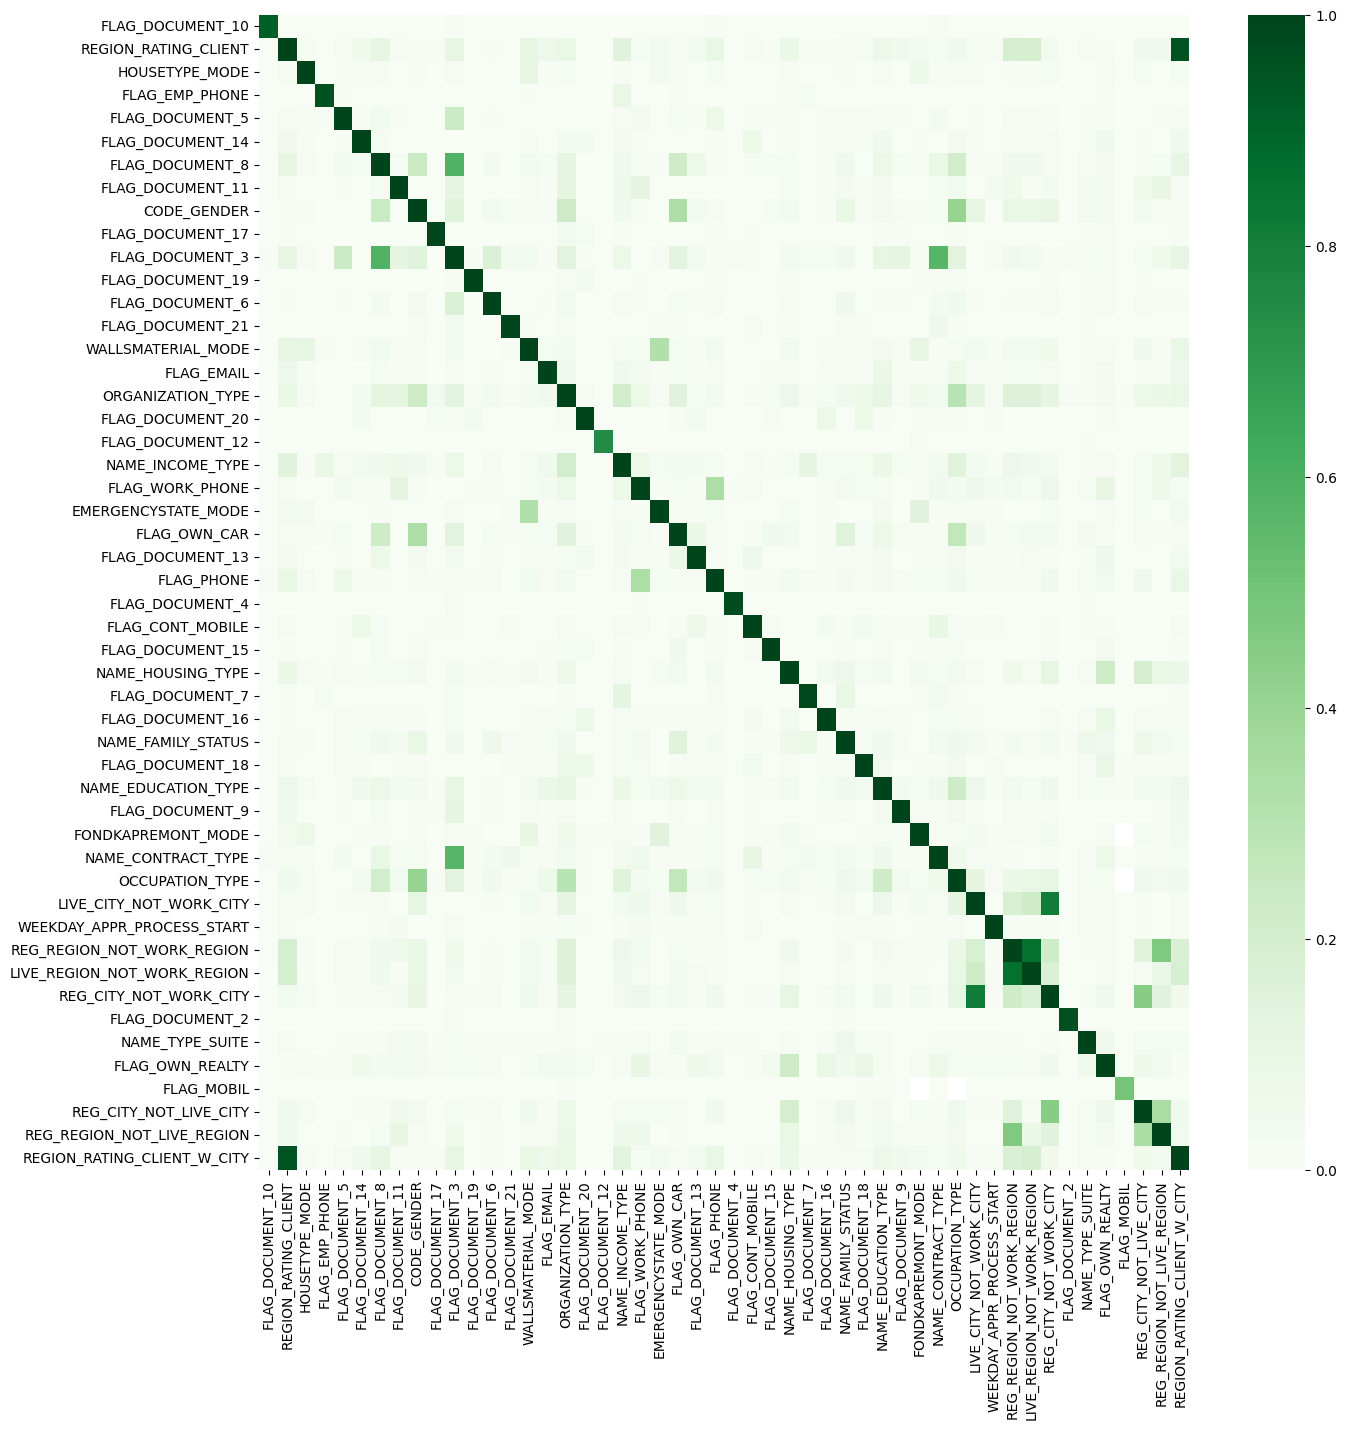

In [21]:
categorical = train[categorical_features]
cat_corr_df = pd.DataFrame()

for i in range(len(categorical_features)):
    for j in range (i, len(categorical_features)):
        x = list(categorical_features)[i]
        y = list(categorical_features)[j]
        corr = cramers_v(categorical[x], categorical[y])
        cat_corr_df.loc[x, y] = corr
        cat_corr_df.loc[y, x] = corr
        
mask = np.array(cat_corr_df)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(cat_corr_df, cmap="Greens")

1. Колонки FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE не мають впливати на рішення щодо видачі кредиту;
2. WEEKDAY_APPR_PROCESS_START також не має впливати на рішення;
3. REGION_RATING_CLIENT та REGION_RATING_CLIENT_W_CITY високо корельовані, тому залишимо REGION_RATING_CLIENT_W_CITY;
4. LIVE_REGION_NOT_WORK_REGION та LIVE_CITY_NOT_WORK_CITY також сильно корелюються з REG_REGION_NOT_WORK_REGION та REG_CITY_NOT_WORK_CITY відповідно.

C:\Users\nemiv\AppData\Local\Temp\ipykernel_10888\1955342849.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


<Axes: >

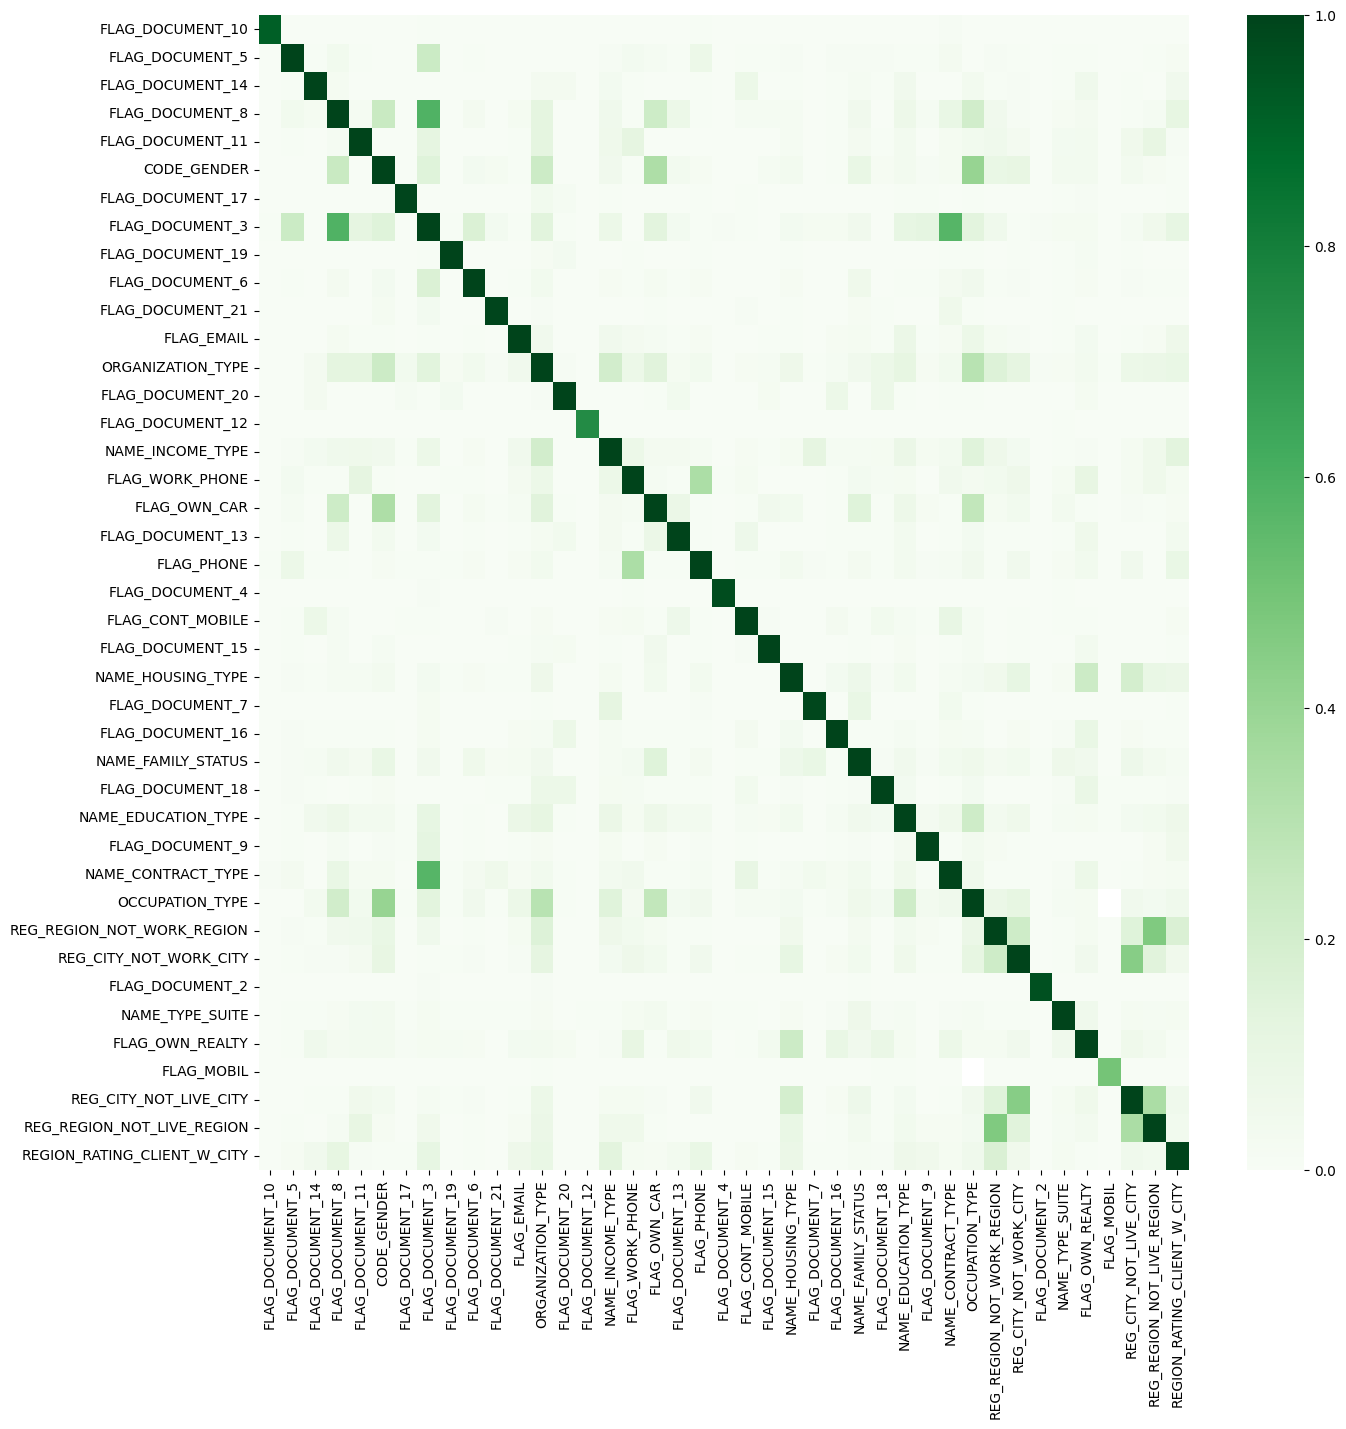

In [22]:
cat_features_1 = categorical_features.copy()
features_to_remove = {"FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE",
                      "REGION_RATING_CLIENT", "LIVE_REGION_NOT_WORK_REGION", "LIVE_CITY_NOT_WORK_CITY",
                      "WEEKDAY_APPR_PROCESS_START", "FLAG_EMP_PHONE"}

for feature in features_to_remove:
    cat_features_1.remove(feature)
    
categorical = train[cat_features_1]
cat_corr_df = pd.DataFrame()

for i in range(len(cat_features_1)):
    for j in range (i, len(cat_features_1)):
        x = list(cat_features_1)[i]
        y = list(cat_features_1)[j]
        corr = cramers_v(categorical[x], categorical[y])
        cat_corr_df.loc[x, y] = corr
        cat_corr_df.loc[y, x] = corr
        
mask = np.array(cat_corr_df)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(cat_corr_df, cmap="Greens")

## *Missing values*

In [23]:
#getting missing values in train set
print("Train set size: %d\n" % len(train))
print("Missing values:")
print(train[cat_features_1 + num_features_1 + list({"TARGET"})].isnull().sum())

Train set size: 249037

Missing values:
FLAG_DOCUMENT_10                    0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_14                    0
FLAG_DOCUMENT_8                     0
FLAG_DOCUMENT_11                    0
CODE_GENDER                         0
FLAG_DOCUMENT_17                    0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_19                    0
FLAG_DOCUMENT_6                     0
FLAG_DOCUMENT_21                    0
FLAG_EMAIL                          0
ORGANIZATION_TYPE                   0
FLAG_DOCUMENT_20                    0
FLAG_DOCUMENT_12                    0
NAME_INCOME_TYPE                    0
FLAG_WORK_PHONE                     0
FLAG_OWN_CAR                        0
FLAG_DOCUMENT_13                    0
FLAG_PHONE                          0
FLAG_DOCUMENT_4                     0
FLAG_CONT_MOBILE                    0
FLAG_DOCUMENT_15                    0
NAME_HOUSING_TYPE                   0
FLAG_DOCUMENT_7                     0
FLAG_DOCUM

In [24]:
#getting missing values in test set
print("Test set size: %d\n" % len(test))
print("Missing values:")
print(test[cat_features_1 + num_features_1].isnull().sum())

Test set size: 48744

Missing values:
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_11                   0
CODE_GENDER                        0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_21                   0
FLAG_EMAIL                         0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_12                   0
NAME_INCOME_TYPE                   0
FLAG_WORK_PHONE                    0
FLAG_OWN_CAR                       0
FLAG_DOCUMENT_13                   0
FLAG_PHONE                         0
FLAG_DOCUMENT_4                    0
FLAG_CONT_MOBILE                   0
FLAG_DOCUMENT_15                   0
NAME_HOUSING_TYPE                  0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_16                   0


1. OCCUPATION_TYPE: відсутні данні розташовані випадково. Для встановлення значення відсутніх змінних потребує подальшого аналізу;
2. NAME_TYPE_SUITE: змінна "хто супроводжує" має не багото відсутніх значень, можна замінити на те, котре найчастіше повторюється;
3. OWN_CAR_AGE: значення відсутні у людей, котрі не мають машини, можна встановити значення $-1$;
4. CNT_FAM_MEMBERS: значення відсутні у людей котрі не мають дітей, а сімейний статус невідомий, можна замінити на $0$;
5. EXT_SOURCE_1: має надто багато відсутніх значень ($63,33$%), варто видалити колонку.
6. EXT_SOURCE_2: відсутні значення можна замінити на середнє;
7. EXT_SOURCE_3: відсутні значення можна замінити на середнє;
8. OBS_60_CNT_SOCIAL_CIRCLE: відсутні значення можна замінити на середнє;
9. DEF_60_CNT_SOCIAL_CIRCLE: відсутні значення можна замінити на середнє;
10. DAYS_LAST_PHONE_CHANGE: значення всього одне, можна видалити рядок;
11. AMT_REQ_CREDIT_BUREAU_MON: відсутні значення можна замінити на середнє;
12. AMT_REQ_CREDIT_BUREAU_YEAR: відсутні значення можна замінити на середнє.

In [25]:
train["NAME_TYPE_SUITE"] = train["NAME_TYPE_SUITE"].fillna(train["NAME_TYPE_SUITE"].value_counts().idxmax())
train["OWN_CAR_AGE"] = train["OWN_CAR_AGE"].fillna(-1)
train["CNT_FAM_MEMBERS"] = train["CNT_FAM_MEMBERS"].fillna(0)

num_features_1.remove("EXT_SOURCE_1")
train = train.dropna(subset = ["DAYS_LAST_PHONE_CHANGE"])

nan_to_mean_features = {"EXT_SOURCE_2", "EXT_SOURCE_3", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
                        "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"}

for feature in nan_to_mean_features:
    train[feature] = train[feature].fillna(train[feature].mean())

In [26]:
test["NAME_TYPE_SUITE"] = test["NAME_TYPE_SUITE"].fillna(test["NAME_TYPE_SUITE"].value_counts().idxmax())
test["OWN_CAR_AGE"] = test["OWN_CAR_AGE"].fillna(-1)

for feature in nan_to_mean_features:
    test[feature] = test[feature].fillna(test[feature].mean())

### *Occupation type*

Фітча OCCUPATION_TYPE, що описує тип зайнятості головним чином залежить від ORGANIZATION_TYPE (тип організації у якій працює), NAME_EDUCATION_TYPE (ступінь освіти), AMT_INCOME_TOTAL (сума кредиту), NAME_INCOME_TYPE (тип доходу), CODE_GENDER (стать). Оскільки ці колонки не містять пропущених значень, то можна за допомогою них заповнити відсутні значення у OCCUPATION_TYPE.

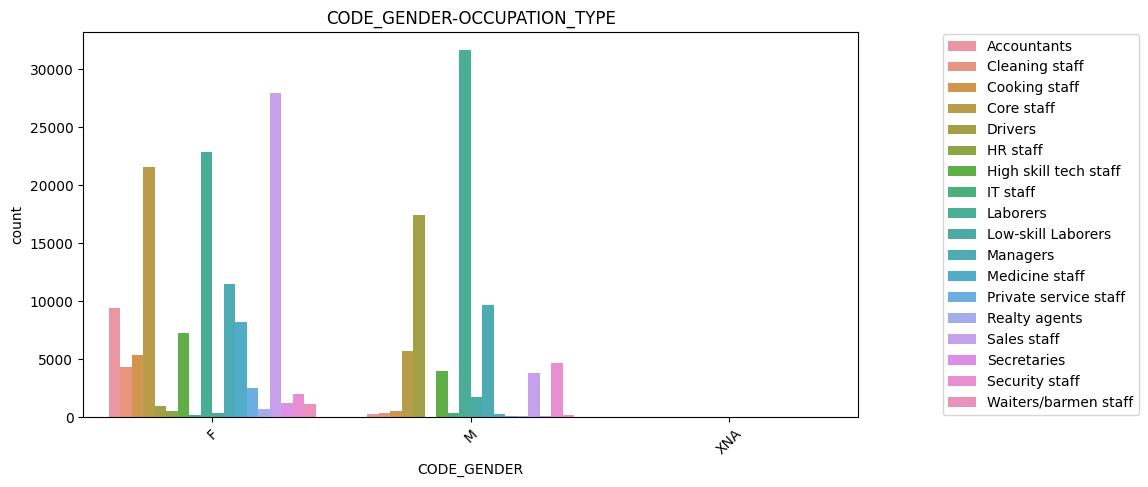

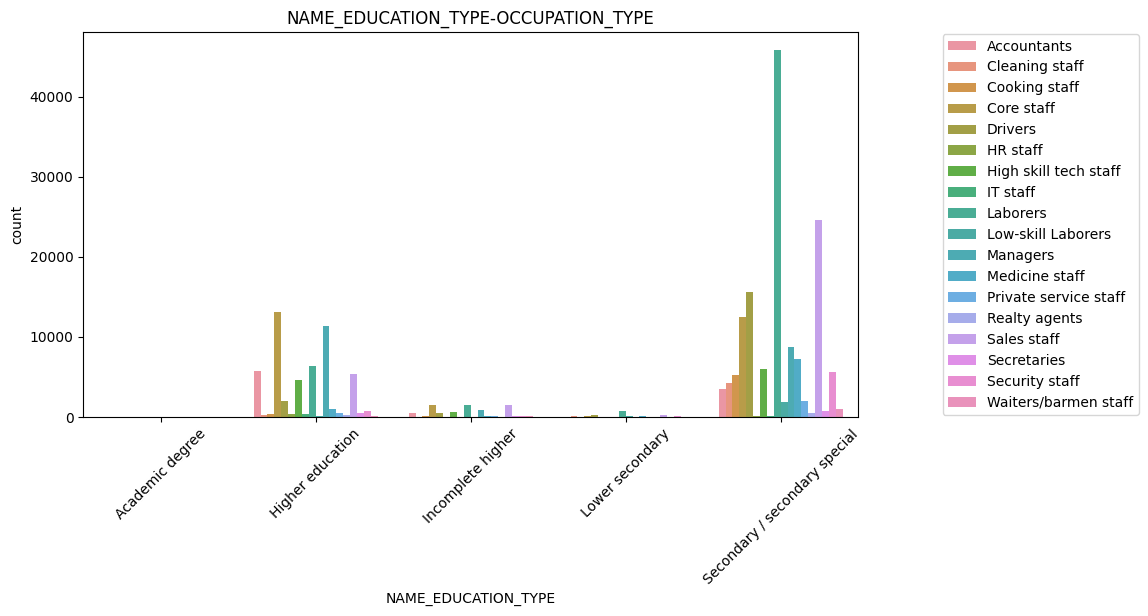

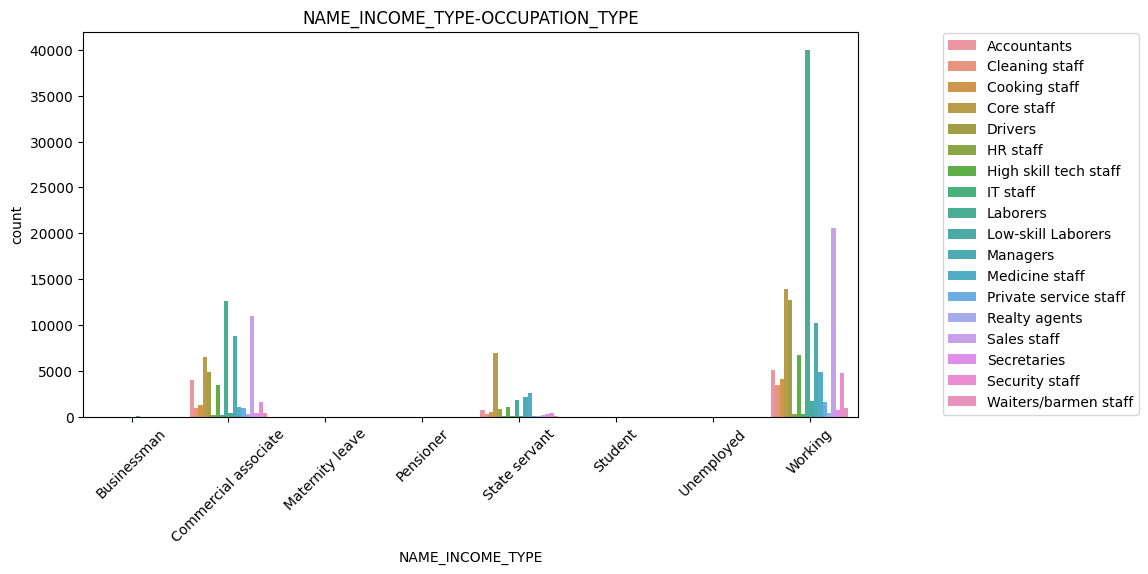

In [27]:
for i in list({"NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE", "CODE_GENDER"}):
    plt.figure(figsize=(10,5))
    sns.countplot(data=train, x=i, hue="OCCUPATION_TYPE")
    plt.title(f"{i}-OCCUPATION_TYPE")
    plt.xlabel(i)
    plt.xticks(rotation=45)
    plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.5), ncol=1)

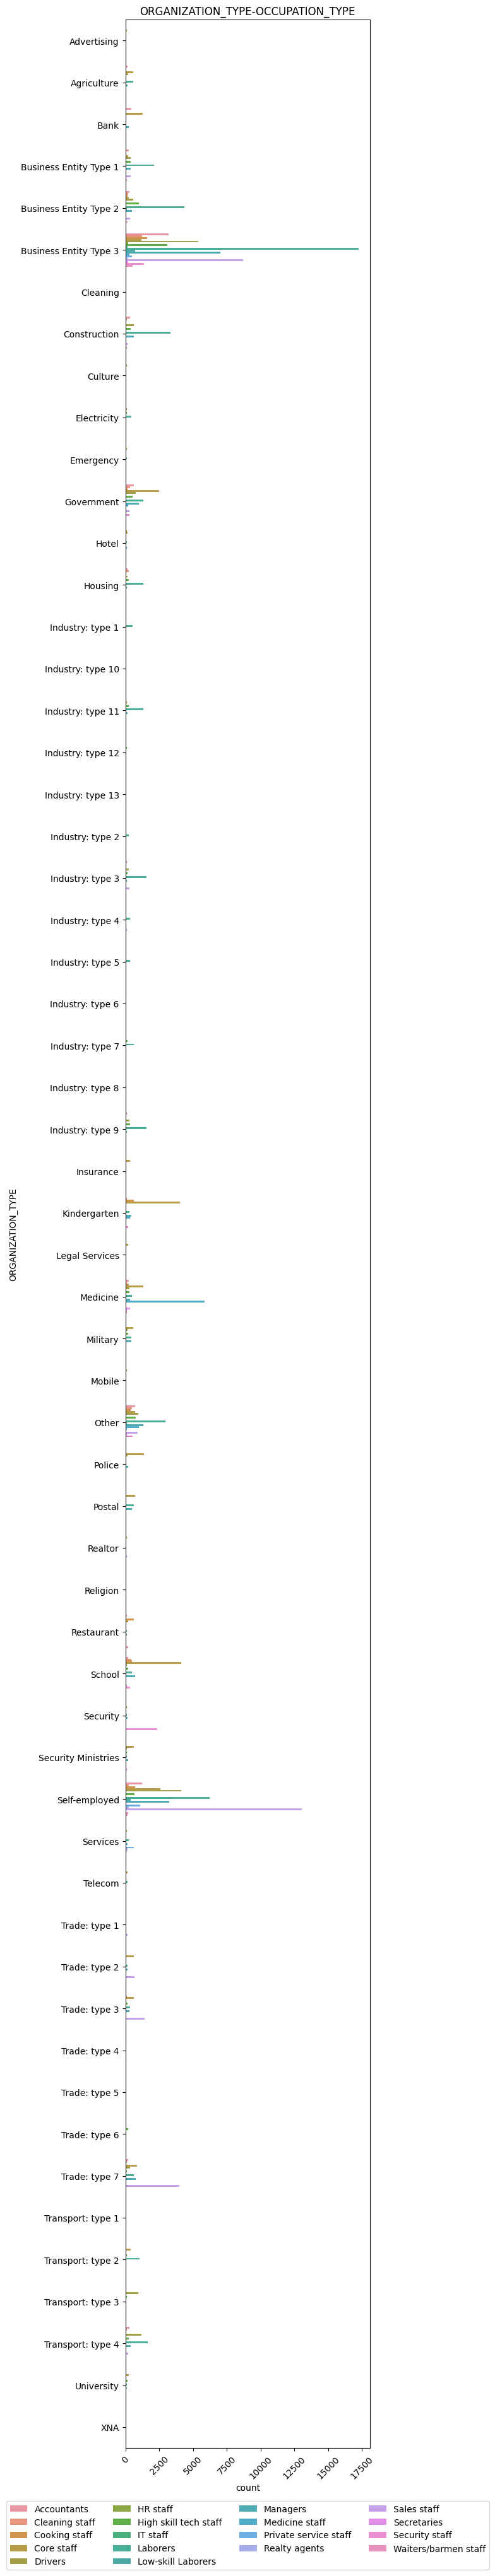

In [28]:
plt.figure(figsize=(5,50))
sns.countplot(data=train, y="ORGANIZATION_TYPE", hue="OCCUPATION_TYPE")
plt.title("ORGANIZATION_TYPE-OCCUPATION_TYPE")
plt.ylabel("ORGANIZATION_TYPE")
plt.xticks(rotation=45)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.02), ncol=4)

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_features = list({"ORGANIZATION_TYPE", "NAME_EDUCATION_TYPE", "AMT_INCOME_TOTAL", "NAME_INCOME_TYPE", "CODE_GENDER"})

train_x = train[train["OCCUPATION_TYPE"].notna()][clf_features]
train_y = train[train["OCCUPATION_TYPE"].notna()]["OCCUPATION_TYPE"]
test_x1 = train[train["OCCUPATION_TYPE"].isna()][clf_features]
test_x2 = test[test["OCCUPATION_TYPE"].isna()][clf_features]

le = LabelEncoder()
for i in list({"ORGANIZATION_TYPE", "NAME_EDUCATION_TYPE", "CODE_GENDER", "NAME_INCOME_TYPE"}):
    train_x[i] = le.fit_transform(train_x[i])
    test_x1[i] = le.fit_transform(test_x1[i])
    test_x2[i] = le.fit_transform(test_x2[i])

train_y = le.fit_transform(train_y)

train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size=0.3)

ovo_clf = OneVsOneClassifier(estimator=DecisionTreeClassifier(max_depth=8))
ovo_clf.fit(train_split_x, train_split_y)
train_pred = ovo_clf.predict(train_split_x)
valid_pred = ovo_clf.predict(validate_x)

In [30]:
test_pred1 = ovo_clf.predict(test_x1[clf_features])
test_pred1_df = pd.DataFrame(le.inverse_transform(test_pred1))
train.loc[train["OCCUPATION_TYPE"].isna(), "OCCUPATION_TYPE"] = test_pred1_df.values

In [31]:
test_pred2 = ovo_clf.predict(test_x2[clf_features])
test_pred2_df = pd.DataFrame(le.inverse_transform(test_pred2))
test.loc[test["OCCUPATION_TYPE"].isna(), "OCCUPATION_TYPE"] = test_pred2_df.values

In [32]:
print("Train set size: %d\n" % len(train))
print("Missing values:")
print(train[cat_features_1 + num_features_1 + list({"TARGET"})].isnull().sum())

print("\nTest set size: %d\n" % len(test))
print("Missing values:")
print(test[cat_features_1 + num_features_1].isnull().sum())

Train set size: 249036

Missing values:
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_11               0
CODE_GENDER                    0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_21               0
FLAG_EMAIL                     0
ORGANIZATION_TYPE              0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_12               0
NAME_INCOME_TYPE               0
FLAG_WORK_PHONE                0
FLAG_OWN_CAR                   0
FLAG_DOCUMENT_13               0
FLAG_PHONE                     0
FLAG_DOCUMENT_4                0
FLAG_CONT_MOBILE               0
FLAG_DOCUMENT_15               0
NAME_HOUSING_TYPE              0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_16               0
NAME_FAMILY_STATUS             0
FLAG_DOCUMENT_18               0
NAME_EDUCATION_TYPE            0
FLA

# *Data classification*

Для класифікації обрано метод випадкового лісу оскільки він може обробляти як категоріальні, так і чисельні змінні. Також він є не сильно чутливим до аутлаєрів, які могли залишитися, може обробляти набори даних з великим числом ознак.

Оскільки дані не є збалансованими, у метод передається параметр class_weight = "balanced". Глибину одного дерева було обрано $8$.

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

transformer = ColumnTransformer(
    transformers = [("numerical", StandardScaler(), num_features_1)],)

new_features = cat_features_1 + num_features_1

train_x = pd.DataFrame(transformer.fit_transform(train[new_features]))
test_x = pd.DataFrame(transformer.transform(test[new_features]))
train_y = train["TARGET"]

train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size=0.3)

rfc = RandomForestClassifier(class_weight = "balanced", max_depth=8)
rfc.fit(train_split_x, train_split_y)

train_pred = rfc.predict(train_split_x)
valid_pred = rfc.predict(validate_x)

train_pred_prob = rfc.predict_proba(train_split_x)
valid_pred_prob = rfc.predict_proba(validate_x)

print("Train set")
print("Accuracy score: ", accuracy_score(train_split_y, train_pred))
print("ROC AUC: ", roc_auc_score(train_split_y, train_pred))
print("ROC AUC probability: ", roc_auc_score(train_split_y, train_pred_prob[:, 1]))
print("Confusion matrix:")
print("    P      N\n", confusion_matrix(train_split_y, train_pred))

print("\nValidation set")
print("Accuracy score: ", accuracy_score(validate_y, valid_pred))
print("ROC AUC:        ", roc_auc_score(validate_y, valid_pred))
print("ROC AUC proba:  ", roc_auc_score(validate_y, valid_pred_prob[:, 1]))
print("Confusion matrix:")
print("    P      N\n", confusion_matrix(validate_y, valid_pred))

Train set
Accuracy score:  0.698075433816148
ROC AUC:  0.6877430258174564
ROC AUC probability:  0.7565066636047656
Confusion matrix:
    P      N
 [[111594  47777]
 [  4856  10098]]

Validation set
Accuracy score:  0.6904070351086186
ROC AUC:         0.663012845534527
ROC AUC proba:   0.7250693070525668
Confusion matrix:
    P      N
 [[47416 20681]
 [ 2449  4165]]


In [36]:
test_pred_prob = rfc.predict_proba(test_x)

submission_df = pd.concat([test["SK_ID_CURR"], pd.DataFrame({"TARGET" : test_pred_prob[:, 1]})], axis=1)
submission_df.to_csv("submission.csv", index=False, header=True)

In [37]:
submission_df.to_csv("C:\\Users\\nemiv\\Desktop\\MachineLearning\\submission.csv", index=False, header=True)

![title](SubmissionResult.png)